# Assignment 4
Use k-Means Clustering for Pharmaceuticals Firms Financial Analysis

In [1]:
#Reference: Chapter 16 Cluster Analysis of Book: Data Mining for Business Analytics: Python
#By Shmueli et. al.
# Most codes were taken from the book referenced above and improved upon.
#Step 1
# import required functionality for Cluster Analysis

import matplotlib.pyplot as plt
#import mlba
import pandas as pd
import seaborn as sns
#from adjustText import adjust_text
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

In [2]:
Pharma_df = pd.read_csv('Pharmaceuticals.csv')
Pharma_df

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE


First to get a general feel for the data, I will take Market capitalization and Net Profit Margin as the two most important factors and make a scatter plot, to see the general spread and layout of companies.

In [ ]:
!pip install adjustText

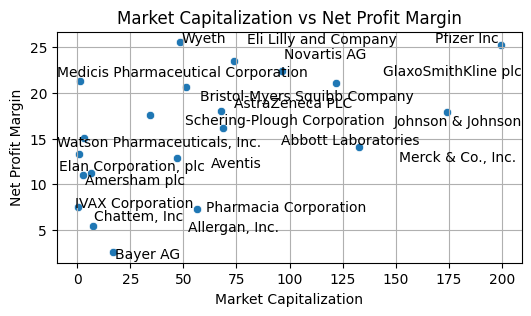

In [4]:
# Making a Scatter Plot with Market Capitalization on X-axis and Net Profit Margin on Y axis and plot the names of companies as dots in the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(6, 3))
sns.scatterplot(x='Market_Cap', y='Net_Profit_Margin', data=Pharma_df)

texts = []
for i, row in Pharma_df.iterrows():
    texts.append(plt.text(row['Market_Cap'], row['Net_Profit_Margin'], row['Name']))

adjust_text(texts)
plt.title('Market Capitalization vs Net Profit Margin')
plt.xlabel('Market Capitalization')
plt.ylabel('Net Profit Margin')
plt.grid(True)
plt.show()

Next from investor's perspective, I will take Beta and P/E ratio as the two most important factors and make a scatter plot, to see the general spread and layout of companies.

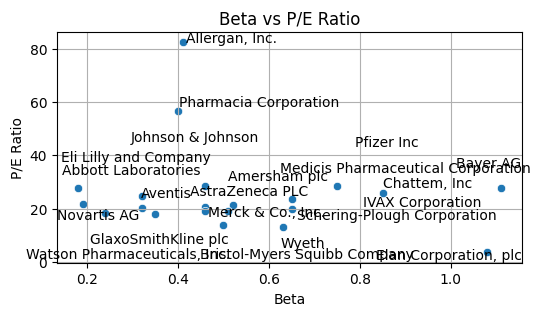

In [5]:
# Making a Scatter Plot with Beta on X-axis and P/E on Y axis and plot the names of companies as dots in the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(6, 3))
sns.scatterplot(x='Beta', y='PE_Ratio', data=Pharma_df)

texts = []
for i, row in Pharma_df.iterrows():
    texts.append(plt.text(row['Beta'], row['PE_Ratio'], row['Name']))

adjust_text(texts)
plt.title('Beta vs P/E Ratio')
plt.xlabel('Beta')
plt.ylabel('P/E Ratio')
plt.grid(True)
plt.show()

Understanding: By looking at both the graphs, it does not seem that there are many distinct clusters. For Starters I will divide the data into 3 clusters.

## Q.a: Clustering
Use only the numerical variables (1 to 9) to cluster the 21 firms.
Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.

Since most of these variable have interdependence, I will not use the Manhattan metric. I will choose to use the Euclidean Distance metric.

### Writing a code to normalize the data and creats 3 clusters using Euclidean distance metric.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

numerical_cols = Pharma_df.columns[2:11]
pharma_numerical_df = Pharma_df[numerical_cols]

#Normalizing the data
scaler = StandardScaler()
pharma_normalized = scaler.fit_transform(pharma_numerical_df)

#Creating 3 clusters as mentioned above using KMeans with Euclidean distance
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
Pharma_df['Cluster'] = kmeans.fit_predict(pharma_normalized)

#Showing the DataFrame with the new cluster assignments
display(Pharma_df[['Name', 'Cluster'] + numerical_cols.tolist()])

,Name,Cluster,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,Abbott Laboratories,0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,"Allergan, Inc.",2,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,Amersham plc,1,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,AstraZeneca PLC,0,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,Aventis,1,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
5,Bayer AG,1,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
6,Bristol-Myers Squibb Company,0,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
7,"Chattem, Inc",1,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
8,"Elan Corporation, plc",1,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3
9,Eli Lilly and Company,0,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4


In [7]:
#Companies in the 3 clusters
for cluster_id in sorted(Pharma_df['Cluster'].unique()):
    cluster_companies = Pharma_df[Pharma_df['Cluster'] == cluster_id]['Name'].tolist()
    print(f"Cluster {cluster_id}: {', '.join(cluster_companies)}")

Cluster 0: Abbott Laboratories, AstraZeneca PLC, Bristol-Myers Squibb Company, Eli Lilly and Company, GlaxoSmithKline plc, Johnson & Johnson, Merck & Co., Inc., Novartis AG, Pfizer Inc, Schering-Plough Corporation, Wyeth
Cluster 1: Amersham plc, Aventis, Bayer AG, Chattem, Inc, Elan Corporation, plc, IVAX Corporation, Medicis Pharmaceutical Corporation, Watson Pharmaceuticals, Inc.
Cluster 2: Allergan, Inc., Pharmacia Corporation


Note: Cluster 2 has only two companies.

##Q: b. Interpret the clusters with respect to the numerical variables used in forming the clusters.

For this we should do a profile plot of centroids, to see where companies in our clusters are similar and where they are difference as per the numerical variables.

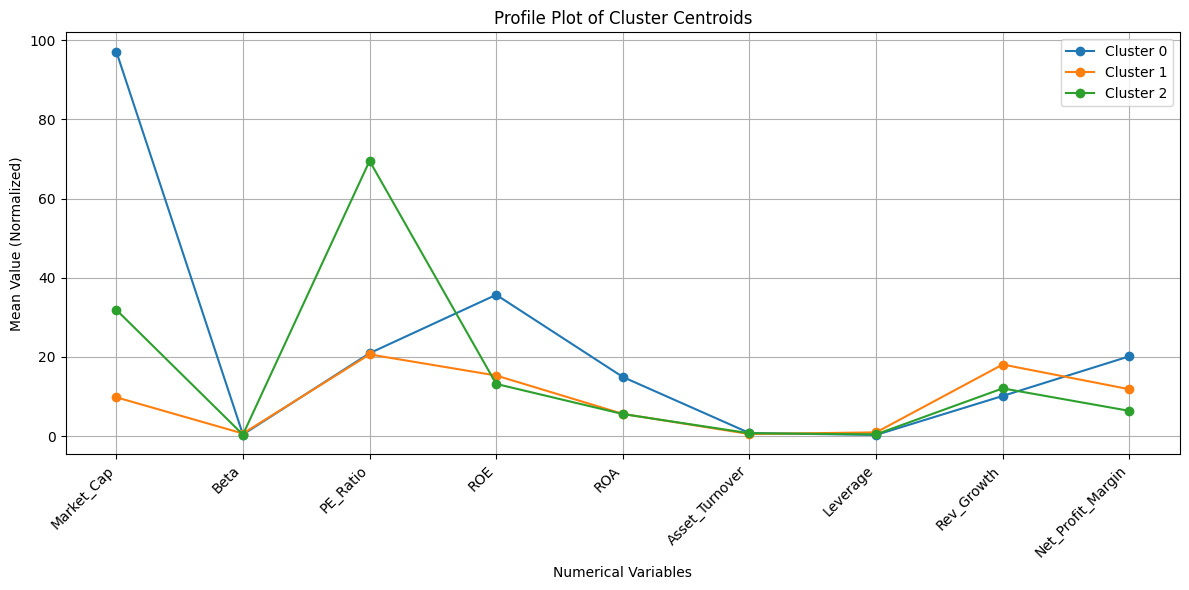

In [8]:
#Calculate the centroids for each cluster
centroids = Pharma_df.groupby('Cluster')[numerical_cols].mean()

#Plotting the plot of centroids
plt.figure(figsize=(12, 6))
for i in range(len(centroids)):
    plt.plot(centroids.columns, centroids.iloc[i], marker='o', label=f'Cluster {i}')

plt.title('Profile Plot of Cluster Centroids')
plt.xlabel('Numerical Variables')
plt.ylabel('Mean Value (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Discussion: We can see that the three clusters are distinct only in Market_Cap and Net_profit_Margin. In many other factors the centeroids lie on top of each other.

Interpretation:

Cluster 0: This cluster represents larger companies with higher market capitalization. They tend to have medium to high profitability (ROE, ROA, Net Profit Margin).

Cluster 1: This cluster has smaller companies with lower market capitalization.Their revenue growth is higher than Cluster 0.

Cluster 2: This is the smallest cluster with only two companies. These companies have a high P/E ratio.

##Q: c. Is there a pattern in the clusters with respect to the categorical variables (10 to 12)? (those not used in forming the clusters)

In [9]:
#Selecting the categorical columns
categorical_cols = ['Median_Recommendation', 'Location', 'Exchange']

#Analyzing the distribution of categorical variables within each cluster
for col in categorical_cols:
    print(f"Distribution of {col} within each cluster:")
    display(Pharma_df.groupby('Cluster')[col].value_counts().unstack(fill_value=0))
    print("\n" + "="*50 + "\n")

Distribution of Median_Recommendation within each cluster:


Median_Recommendation,Hold,Moderate Buy,Moderate Sell,Strong Buy
Cluster,,,,
0,6,3,2,0
1,2,3,2,1
2,1,1,0,0




Distribution of Location within each cluster:


Location,CANADA,FRANCE,GERMANY,IRELAND,SWITZERLAND,UK,US
Cluster,,,,,,,
0,0,0,0,0,1,2,8
1,0,1,1,1,0,1,4
2,1,0,0,0,0,0,1




Distribution of Exchange within each cluster:


Exchange,AMEX,NASDAQ,NYSE
Cluster,,,
0,0,0,11
1,1,1,6
2,0,0,2


Discussion:There are some patterns in the clusters with respect to the categorical variables, as we can see: Median Reccomendation (Hold), Distribution of Location (US), and Distribution of Stock Exchange (NYSE), have all been split into the 3 clusters with a decent amount of frequency. But this can be attributed to the spread of the dataset, if there were more entries for the other categorical columns, the spread might have been different.


##Q: d Provide an appropriate name for each cluster using any or all of the variables in the dataset.
Answer:
I would name Cluster 0 as High Cap high Profit.
Cluster 1 as Low Cap Medium Profit.
Cluster 2 as Medium Cap Low Profit.